# Определение перспективного тарифа для телеком-компании

Компания "Мегалайн" - федеральный оператор сотовой связи, предлагает клиентам два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департмент хочет понять, какой тариф приносит больше денег.

Необходимо провести предварительный анализ на небольшой выборке клиентов. Даны данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Необходимо проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

## Обзор данных

Импортируем все необходимые для работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Прочитаем файлы `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv`  и сохраним их в переменной `calls`, `internet`, `messages`, `tariffs` и `users` соответственно:

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

**Ознакомимся с каждым датасетом отдельно:**

**1.** Получим информацию о таблице `calls`:

In [3]:
display(calls.head(10)) # получение первых 10 строк таблицы calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице четыре столбца. Тип данных в столбцах `id` и `call_date` — object, в столбце `duration` - float, в столбце `user_id` - int.

Согласно документации к данным:

- id — уникальный номер звонка;
- call_date — дата звонка;
- duration — длительность звонка в минутах;
- user_id — идентификатор пользователя, сделавшего звонок.

**2.** Получим информацию о таблице `internet`:

In [5]:
display(internet.head(10)) # получение первых 10 строк таблицы internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице пять столбцов. Тип данных в столбцах `id` и `session_date` — object, в столбце `mb_used` - float, в столбце `user_id` и `Unnamed` - int. 

Согласно документации к данным:

- id — уникальный номер сессии;
- mb_used — объем потраченного за сессию интернет-трафика (в мегабайтах);
- session_date — дата интернет-сессии;
- user_id — идентификатор пользователя.

**3.** Получим информацию о таблице `messages`:

In [7]:
display(messages.head(10)) # получение первых 10 строк таблицы messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца. Тип данных в столбцах `id` и `message_date` — object, в столбце `user_id` - int.

Согласно документации к данным:

- id — уникальный номер сообщения;
- message_date — дата сообщения;
- user_id — идентификатор пользователя, отправившего сообщение.

**4.** Получим информацию о таблице `tariffs`:

In [9]:
display(tariffs.head(10)) # получение первых 10 строк таблицы tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице восемь столбцов. Тип данных в столбце `tariff_name` — object, в остальных столбцах - int.

Согласно документации к данным:

- tariff_name — название тарифа;
- rub_monthly_fee — ежемесячная абонентская плата в рублях;
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
- messages_included - количество сообщений в месяц, включённых в абонентскую плату;
- mb_per_month_included - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute - стоимость минуты разговора сверх тарифного пакета;
- rub_per_message - стоимость отправки сообщения сверх тарифного пакета;
- rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета.


**5.** Получим информацию о таблице `users`:

In [11]:
display(users.head(10)) # получение первых 10 строк таблицы users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице восемь столбцов. Тип данных в столбце `user_id` и `age ` — int, в остальных столбцах - object.

Согласно документации к данным:

- user_id  — уникальный идентификатор пользователя;
- first_name — имя пользователя;
- last_name — фамилия пользователя;
- age - возраст пользователя (годы);
- reg_date - дата подключения тарифа (день,месяц,год);
- churn_date - дата прекращения пользования тарифом;
- city - город проживания пользователя;
- tariff - название тарифного плана.

**6.** Проверим датасеты на наличие дубликатов:

In [13]:
print('Количество дубликатов в датасете со звонками:',calls.duplicated().sum())
print('Количество дубликатов в датасете с интернет-трафиком:',internet.duplicated().sum())
print('Количество дубликатов в датасете с сообщениями:',messages.duplicated().sum())
print('Количество дубликатов в датасете с тарифами:',tariffs.duplicated().sum())
print('Количество дубликатов в датасете с пользователями:',users.duplicated().sum())

Количество дубликатов в датасете со звонками: 0
Количество дубликатов в датасете с интернет-трафиком: 0
Количество дубликатов в датасете с сообщениями: 0
Количество дубликатов в датасете с тарифами: 0
Количество дубликатов в датасете с пользователями: 0


**Вывод**

В каждой строке таблиц — полные данные о том каким тарифом пользовался пользователь и как он это делал, и дана информация по пользователю в разрезе идентификации пользователя. 

Данных достаточно для проверки гипотез. Встречаются пропуски в столбце `churn_date`, но согласно документации данные отсутствуют потому, что тариф ещё действовал на момент выгрузки данных.

В датасете `internet` существует лишний столбец, дублирующий индексацию строк.

Некоторые значения в датасетах требуют изменения типа данных и округления значений:
- в датасете `calls` - столбец duration нужно округлить до ровного значения, поскольку "Мегалайн" всегда округляет секунды до минут
- в датасете `internet` - столбец mb_used нужно округлить до ровного значения, поскольку "Мегалайн" всегда округляет мегабайты до гигабайт, и для расчета ровные значения использовать удобнее.
- в датасетах `users`, `messages`, `internet`, `calls` ячейки с датами нужно привести к формату даты.

## Подготовка данных

### Исправление ошибок

Приведем данные к нужным типам:

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [15]:
print('Количество данных по звонкам не за 2018 год:',
      calls[(calls['call_date'] > "2018-12-31") & (calls['call_date'] < "2018-01-01")]['call_date'].count())
print('Количество данных по интернет трафику не за 2018 год:',
      internet[(internet['session_date'] > "2018-12-31") & (internet['session_date'] < "2018-01-01")]['session_date'].count())
print('Количество данных по сообщениям не за 2018 год:',
      messages[(messages['message_date'] > "2018-12-31") & (messages['message_date'] < "2018-01-01")]['message_date'].count())
print('Количество данных по дате прекращения пользования тарифом не за 2018 год:',
      users[(users['churn_date'] > "2018-12-31") & (users['churn_date'] < "2018-01-01")]['churn_date'].count())
print('Количество данных по дате подключения тарифа не за 2018 год:',
      users[(users['reg_date']> "2018-12-31") &(users['reg_date']< "2018-01-01")]['reg_date'].count())

Количество данных по звонкам не за 2018 год: 0
Количество данных по интернет трафику не за 2018 год: 0
Количество данных по сообщениям не за 2018 год: 0
Количество данных по дате прекращения пользования тарифом не за 2018 год: 0
Количество данных по дате подключения тарифа не за 2018 год: 0


Откруглим значения секунд разговора и интернет-трафика в датасетах `calls` и `internet`:

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

В датесете `internet` выявлен столбец дублирующий индексацию во всем датафрейме. Избавимся от столбца `Unnamed: 0`:

In [17]:
internet = internet.loc[:,'id' : 'user_id']

### Объединение таблиц

Далее, для того чтобы посчитать для каждого пользователя количество сделанных звонков, отправленных сообщений и объем израсходованного интернет-трафика по месяцам, добавим в датасеты `calls`, `internet`, `messages` столбцы со значением месяца:

In [18]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [19]:
# сводная таблица по звонкам
calls_pivot = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count','sum'])
calls_pivot.columns = ['calls', 'duration']
calls_pivot.reset_index().head()

,user_id,month,calls,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [20]:
# сводная таблица по сообщениям
messages_pivot = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
messages_pivot.columns = ['messages']
messages_pivot.reset_index().head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [21]:
# сводная таблица по интернет-трафику
internet_pivot = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
internet_pivot.columns = ['mb_used']
internet_pivot.reset_index().head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [22]:
# объединяем все три сводные таблицы в одну
cm_data = calls_pivot.merge(messages_pivot, on = ['user_id','month'], how = 'outer')
cm_data = cm_data.reset_index()
cmi_data = cm_data.merge(internet_pivot, on = ['user_id','month'], how = 'outer')
cmi_data.reset_index().head()

,index,user_id,month,calls,duration,messages,mb_used
0,0,1000,5,22.0,159.0,22.0,2256.0
1,1,1000,6,43.0,172.0,60.0,23257.0
2,2,1000,7,47.0,340.0,75.0,14016.0
3,3,1000,8,52.0,408.0,81.0,14070.0
4,4,1000,9,58.0,466.0,57.0,14581.0


In [23]:
#Проверим получившуюся таблицу на пропуски
cmi_data.isna().sum()

user_id       0
month         0
calls        40
duration     40
messages    497
mb_used      11
dtype: int64

In [24]:
#Заменим пропуски в датасете на 0, поскольку абонент не писал и не пользовался интернетом
cmi_data.loc[cmi_data['messages'].isna(), 'messages'] = 0
cmi_data.loc[cmi_data['mb_used'].isna(), 'mb_used'] = 0

### Расчет помесячной выручки

Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [25]:
#Объединим датасет cmi_data с датасетами tariffs предварительно переименовав столбец в датасете tariffs
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)
pre_total_data = cmi_data.merge(users, on = 'user_id', how = 'left')
total_data = pre_total_data.merge(tariffs, on = 'tariff', how = 'outer')

In [26]:
#Напишем фукцию одной строки и добавим в таблицу ваше столбец с выручкой
def revenue(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    minutes_tariff = row['minutes_included']
    mb_tariff = row['mb_per_month_included']
    messages_tariff = row['messages_included']
    minutes_cost = row['rub_per_minute']
    gb_cost = row['rub_per_gb']
    messages_cost = row['rub_per_message'] 
    tariff_fee = row['rub_monthly_fee']
    
    revenue = 0
    
    if duration>minutes_tariff:
        calls_revenue = (duration-minutes_tariff)*minutes_cost
        revenue +=  calls_revenue
    elif messages>messages_tariff:
        messages_revenue = (messages-messages_tariff)*messages_cost
        revenue +=  messages_revenue
    elif mb_used>mb_tariff:
        internet_revenue = np.ceil(((mb_used-mb_tariff)/1024))*gb_cost
        revenue +=  internet_revenue
    return revenue+tariff_fee

total_data['revenue'] = total_data.apply(revenue, axis=1)

display(total_data.head())

,user_id,month,calls,duration,messages,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


**Вывод**

Данные приведены к нужным типам, пропуски устранены, исходные таблицы объеденены в одну, а также выполнен расчет помесячной выручки.
Итоговые данные готовы к анализу.

## Анализ данных

Посчитаем среднее количество минут разговора, сообщений и объёма интернет-трафика по каждому пользователю тарифа в месяц и построим гистограммы для этих значений. Также вычислим дисперсию и стандартное отклонение в этих данных.

### Количество минут разговора

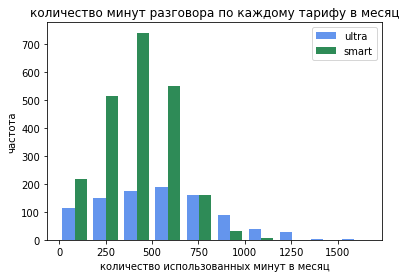

In [27]:
#Построим график для количества минут разговора по каждому тарифу за каждый месяц
ultra_duration = total_data.query('tariff == "ultra"')['duration']
smart_duration = total_data.query('tariff == "smart"')['duration']
names = ['ultra', 'smart']
colors = ['cornflowerblue','seagreen']

fig, ax = plt.subplots()
ax.hist([ultra_duration,smart_duration], label = names, color = colors)
ax.legend()
plt.xlabel('количество использованных минут в месяц')
plt.ylabel('частота')
plt.title('количество минут разговора по каждому тарифу в месяц')
plt.show()

На тарифе "Ультра" значения количества минут разговора неравномерны. На тарифе "Смарт" значения практически не меняются и остаются в среднем равными 450 минутам.

Вычислим дисперсию и стандартное отклонение в данных по использованным минутам.

In [28]:
total_data.pivot_table(index=['tariff'], 
                       values='duration', 
                       aggfunc=[np.median, np.var, np.std])

,median,var,std
,duration,duration,duration
tariff,,,
smart,423.0,35844.189551,189.325618
ultra,528.0,94203.418396,306.925754


По тарифу "Ультра" минуты разговора имеют большую дисперсию и большее стандартное отклонение, чем на тарифе "Смарт". Кроме того, выбросов в данных больше на тарифе "Ультра" чем на тарифе "Смарт".

### Количество использованных мегабайт интернет-трафика

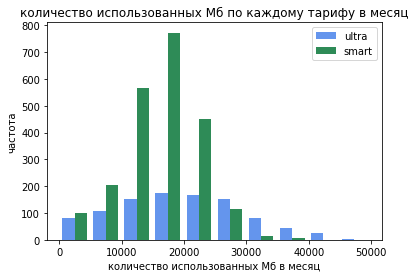

In [29]:
#Построим график для количества использованных Мб интернет трафика по каждому тарифу за каждый месяц
ultra_mb = total_data.query('tariff == "ultra"')['mb_used']
smart_mb = total_data.query('tariff == "smart"')['mb_used']
names = ['ultra', 'smart']
colors = ['cornflowerblue','seagreen']

fig, ax = plt.subplots()
ax.hist([ultra_mb,smart_mb], label = names, color = colors, bins = 10)
ax.legend()
plt.xlabel('количество использованных Мб в месяц')
plt.ylabel('частота')
plt.title('количество использованных Мб по каждому тарифу в месяц')
plt.show()

На обоих тарифах количество потраченных мегабайт интернет-трафика находятся в коридиоре значений от 15 до 25 Гб в месяц.

Вычислим дисперсию и стандартное отклонение в данных по использованным мегабайтам трафика.

In [30]:
total_data.pivot_table(index=['tariff'], 
                       values='mb_used', 
                       aggfunc=[np.median, np.var, np.std])

,median,var,std
,mb_used,mb_used,mb_used
tariff,,,
smart,16531.0,3.454591e+07,5877.576978
ultra,19324.0,1.019356e+08,10096.317202


Наблюдается такая же ситуация по дисперсии и стандартному отклонению в значениях интернет-трафика по тарифу "Ультра" как и в данных по минутам разговора.

### Количество отправленных смс

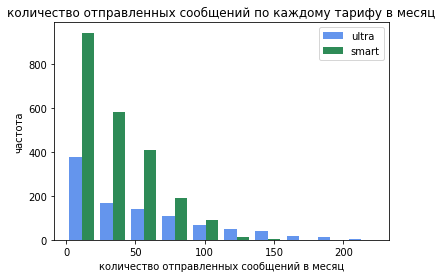

In [31]:
#Построим график для количества отправленных сообщений по каждому тарифу за каждый месяц
ultra = total_data.query('tariff == "ultra"')['messages']
smart = total_data.query('tariff == "smart"')['messages']
names = ['ultra', 'smart']
colors = ['cornflowerblue','seagreen']

fig, ax = plt.subplots()
ax.hist([ultra,smart], label = names, color = colors, bins = 10)
ax.legend()
plt.xlabel('количество отправленных сообщений в месяц')
plt.ylabel('частота')
plt.title('количество отправленных сообщений по каждому тарифу в месяц')
plt.show()

На тарифе "Смарт" количество отправленных сообщений сильно не меняется, значения находятся в диапазоне от 20 до 30 сообщений в месяц. А вот на тарифе "Ультра" ярко выраженной моды не налюдается.

Вычислим дисперсию и стандартное отклонение в данных по количеству отправленных сообщений.

In [32]:
total_data.pivot_table(index=['tariff'], 
                       values='messages', 
                       aggfunc=[np.median, np.var, np.std])

,median,var,std
,messages,messages,messages
tariff,,,
smart,28.0,796.812958,28.227876
ultra,38.0,2285.266143,47.804457


Снова в тарифе Ультра наблюдается большая дисперсия, чем на тарифе "Смарт".

**Вывод**

Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. 
По гистограммам наглядно видно, что дисперсия по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям: по длительности разговора, числу сообщений и использованному интернет-трафику. Также на гистограммах видно, что средне у "Смарта" явно выражена.

Таким образом, можно предположить, что поведение пользователей тарифа "Ультра" более непредсказуемое с точки зрения потребления телекоммуникационных услуг, возможно их жизнь нестандартна, и каждый месяц им необходимо разное количество минут, сообщений и интернет-трафика. А пользователи более дешевого тарифа, скорее всего предпочитают более размеренную жизнь, а значит из месяца в месяца примерно одинаково используют количество минут, сообщений и интеренет трафика из пакета тарифа. 

## Проверка гипотезы

### Статистический тест №1

H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

α=1%

In [33]:
ultra = total_data.query('tariff == "ultra"')['revenue']
smart = total_data.query('tariff == "smart"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [34]:
total_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,724.0
ultra,1950.0


**Вывод**

Средние значения выручки по тарифам различаются почти в 3 раза. 
А значит пользователь с тарифом "Смарт" с абонентской платой в 550 рублей по итогам месяца заплатит больше из-за нехватки услуг в рамках тарифного пакета.

После проведенного теста можно с уверенностью в 99% утверждать, что выручка с разных тарифов у "Мегалайна" различается.

### Статистический тест №2

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α=1%

In [35]:
moscow = total_data.query('city == "Москва"')['revenue']
regions = total_data.query('city != "Москва"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0033360821130007305
Отвергаем нулевую гипотезу


In [36]:
#Проверим тест посчитав среднюю выручку по Москве и Регионам
def change_region(city):
    if city == 'Москва': 
        return 'Москва'
    
    else: 
        return 'Другой регион'
    
total_data['region'] = total_data['city'].apply(change_region)
total_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1015.0
Москва,1350.0


**Вывод**

Статистический тест опроверг гипотезу о том, что выручка в Москве равна средней выручке в регионах. И действительно, по сводной таблице можно наблюдать, что выручка все же в Москве больше.

## Общий вывод

По результатам анализа, выявлено, что выручка "Мегалайн" от тарифа "Ультра" больше, чем от тарифа "Смарт". 

Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают еще 150 рублей ежемесячно.

Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.
Средние доходы от пользователей в Москве отличаются от доходов в других населенных пунктах, примерно на 250 рублей в месяц больше.